## Version III

\begin{align}
    S_{0}&\sim Normal(0,1)\\
    A_t & \sim \pi_b = Bernoulli(.5)\\
    M_{t1}&\sim Normal(\sqrt{|S_t|}+(A_t-.5), 2)\\
    M_{t2}&\sim Normal(-.5 S_t+.5(A_t-.5)*\sqrt{|S_t|}, 2)\\
    R_{t}&\sim Normal( .75\{S_t + \sqrt{|S_t|}+(1+\sqrt{|M_{t1}|+|M_{t2}|})(A_t-.5)\}+1.5\{M_{t1}+M_{t2}\}, 2)\\
    S_{t+1}&\sim R_t\\
    \pi_{e}&\sim Bernoulli(expit(.7*S_{t}))\\
    a_0&=0
\end{align}

In [1]:
import pickle
with open("true_iDE_IME_DDE_DME_direct_est_stdM_2_stdS_2.txt","rb") as fp:
    Error = pickle.load(fp) 
    
import numpy as np
out = []
for t in [100,200,400,800,1600,3200,6400]:
    out.append(Error[t][100])
import pandas as pd
out = pd.DataFrame(out)
out['d0'] = out[0]-out[0].shift(-1)
out['d1'] = out[1]-out[1].shift(-1)
out['d2'] = out[2]-out[2].shift(-1)
out['d3'] = out[3]-out[3].shift(-1)
out['d4'] = out[4]-out[4].shift(-1)
out['IDE'] = out[0]-out[1]
out['IME'] = out[1]-out[2]
out['DDE'] = out[2]-out[3]
out['DME'] = out[3]-out[4]
out['IDE_d'] = out['IDE']-out['IDE'].shift(-1)
out['IME_d'] = out['IME']-out['IME'].shift(-1)
out['DDE_d'] = out['DDE']-out['DDE'].shift(-1)
out['DME_d'] = out['DME']-out['DME'].shift(-1)
out

,0,1,2,3,4,d0,d1,d2,d3,d4,IDE,IME,DDE,DME,IDE_d,IME_d,DDE_d,DME_d
0,9.654987,7.017952,3.430960,2.230425,1.563140,-0.095837,-0.074393,-0.041200,-0.020035,-0.009064,2.637035,3.586991,1.200535,0.667285,-0.021444,-0.033194,-0.021164,-0.010972
1,9.750824,7.092345,3.472160,2.250460,1.572204,-0.049003,-0.038119,-0.021371,-0.010710,-0.005515,2.658479,3.620185,1.221699,0.678256,-0.010884,-0.016747,-0.010662,-0.005194
2,9.799826,7.130463,3.493531,2.261170,1.577720,-0.026017,-0.020453,-0.011340,-0.005210,-0.002121,2.669363,3.636932,1.232361,0.683450,-0.005564,-0.009114,-0.006129,-0.003090
3,9.825843,7.150917,3.504871,2.266380,1.579840,-0.012373,-0.009599,-0.005447,-0.002622,-0.001154,2.674927,3.646046,1.238490,0.686540,-0.002775,-0.004152,-0.002825,-0.001468
4,9.838216,7.160515,3.510318,2.269002,1.580994,-0.006407,-0.005040,-0.002866,-0.001272,-0.000574,2.677701,3.650198,1.241315,0.688008,-0.001367,-0.002174,-0.001594,-0.000697
5,9.844623,7.165555,3.513183,2.270274,1.581568,-0.003403,-0.002630,-0.001467,-0.000595,-0.000269,2.679068,3.652372,1.242910,0.688705,-0.000773,-0.001163,-0.000873,-0.000326
6,9.848026,7.168185,3.514651,2.270868,1.581837,NaN,NaN,NaN,NaN,NaN,2.679841,3.653535,1.243782,0.689031,NaN,NaN,NaN,NaN


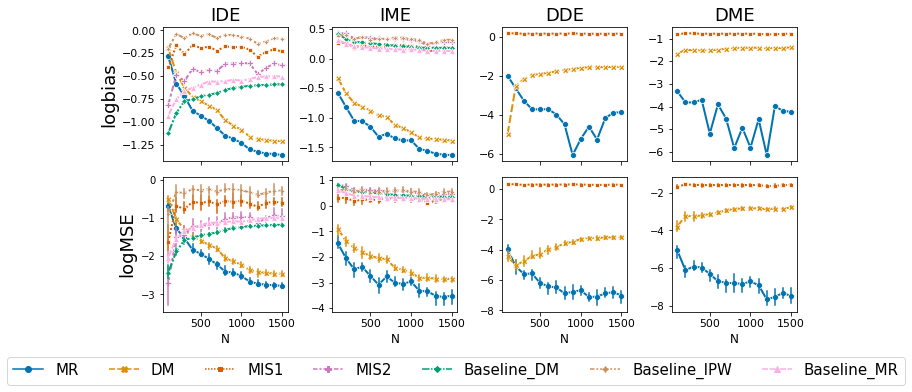

In [2]:
#Truncate does not matter 20 ok
import pickle
with open("estimate_additive_identity_L7_stdM_2_stdS_2baselines.txt","rb") as fp:
    Error = pickle.load(fp)       
from plot import summary_baseline
result = summary_baseline(Error, N_range = np.arange(1, 16) * 100, T_range = [25], absolute = True, true = np.array([2.677701,3.650198]))
#result.groupby(['N','estimand']).mean()[['IDE_error','IME_error','DDE_error','DME_error',
#                                         'IDE_MSE','IME_MSE','DDE_MSE','DME_MSE']]
#Truncate does not matter 20 ok
import pickle
with open("estimate_additive_identity_L7_stdM_2_stdS_2.txt","rb") as fp:
    Error = pickle.load(fp)       
from plot import plot, summary
result_1 = summary(Error, N_range = np.arange(1, 16) * 100, T_range = [25], absolute = True, true = np.array([2.679841,3.653535,1.243782,0.689031]))
#result.groupby(['N','estimand']).mean()[['IDE_error','IME_error','DDE_error','DME_error',
#                                         'IDE_MSE','IME_MSE','DDE_MSE','DME_MSE']]

result_all = pd.concat([result_1, result],ignore_index=True)
result_all = result_all[result_all.estimand.isin(['MR','DM', 'MIS1', 'MIS2','Baseline_IPW','Baseline_MR','Baseline_DM'])]

from plot import plot_baseline
plot_baseline(result_all, x='N')

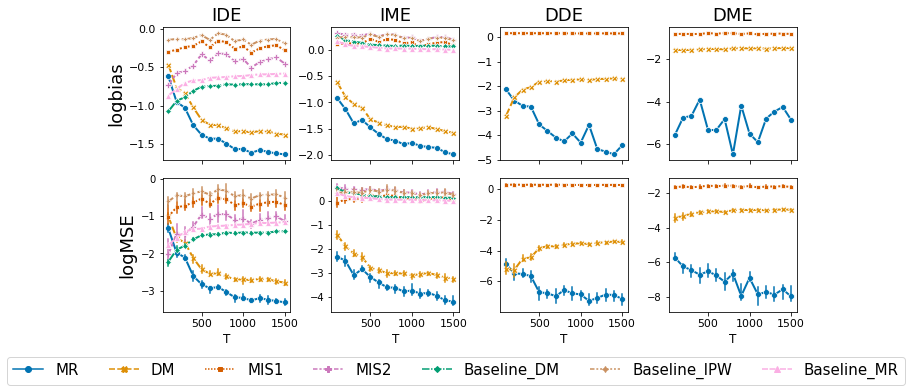

In [12]:
#Truncate does not matter 20 ok
import pickle
with open("estimate_additive_identity_L7_stdM_2_stdS_2_Tbaselines.txt","rb") as fp:
    Error = pickle.load(fp)       
from plot import summary_baseline
result = summary_baseline(Error, N_range = [50], T_range = np.arange(1, 16) * 100, absolute = True, true = np.array([2.677701,3.650198]))
#result.groupby(['N','estimand']).mean()[['IDE_error','IME_error','DDE_error','DME_error',
#                                         'IDE_MSE','IME_MSE','DDE_MSE','DME_MSE']]
#Truncate does not matter 20 ok
import pickle
with open("estimate_additive_identity_L7_stdM_2_stdS_2_T.txt","rb") as fp:
    Error = pickle.load(fp)       
from plot import plot, summary
result_1 = summary(Error, N_range = [50], T_range = np.arange(1, 16) * 100, absolute = True, true = np.array([2.679841,3.653535,1.243782,0.689031]))
#result.groupby(['N','estimand']).mean()[['IDE_error','IME_error','DDE_error','DME_error',
#                                         'IDE_MSE','IME_MSE','DDE_MSE','DME_MSE']]

result_all = pd.concat([result_1, result],ignore_index=True)
result_all = result_all[result_all.estimand.isin(['MR','DM', 'MIS1', 'MIS2','Baseline_IPW','Baseline_MR','Baseline_DM'])]

from plot import plot_baseline
plot_baseline(result_all, x='T')